# Proyecto parcial 2

## Creación, optimización y predicción de rendimiento de un portafolio de inversión

### Elaborado por:
> ### Héctor Sebastián Castañeda Arteaga
> ### Rogelio Campos Muria
> ### Sergio Vargas

## Proposito
> ### Crear un portafolio de inversión, optimizar funciones de riesgo-beneficio y predecir el valor de portafolio en 10 años


## Planteamiento
> ### ¡Felicidades, ganaste la loteria! El pago que te hicieron despues de impuestos fue de 2 millones de dolares. Antes de gastarte tu nueva fortuna en coches y viajes, decides que quieres invertir la mitad del dinero en un portafolio de inversión, con el proposito de que si alguna vez tienes hijos, ellos puedan minimo tener una educación asegurada. Ya que el objetivo de tus inversiones no es generar ganancias, si no preservar el valor de tu dinero, escoges empresas solidas para garantizar returnos. Evitas empresas de tecnologia y farmaceuticas ya que sabes de su gran volatilidad. Buscas un portafolio con Beta igual o menor a 1 y que tenga un rendimiento esperado de 20% anual.


## Parametros
> ### 1. Ningun sector puede ocupar más del 40% del portafolio
> ### 2. No compañias de tecnologia ni farmaceuticas
> ### 3. Rendimiento a 1 año en el futuro de 20%
> ### 4. Capital total: 1  millón de dolares
> ### 5. Se debe diversificar en mínimo 5 acciones
> ### 6. Beta menor a 1

## Acciones
> ### Después de que le comentaras a tu amigo sobre tus planes, el te recomendo a un asesor financiero. Le comentas tus objetivos y parametros requeridos para tu porafolio de inversión. Despues de realizar una investigación, el asesor delimita sus opciones de acciones a 12 en particular que cree pueden satisfacer los criterios. 
> ### Las acciones son:
     Energia:
        Exxon Mobil (XOM)
        Occidental Petroleum (OXY)
        Chevron (CVX)
     Alimentos:
        Coca-Cola (KO)
        McDonald´s (MCD)
        Starbucks (SBUX)
     Automotriz:
        Toyota (TM)
        General Motors (GM)
        Ford (F)
     Retail:
        Walmart (WMT)
        Costco (COST)
        CVS Health Group (CVS)

## Prodecimientos 

In [871]:
# Librerias utilizadas

from pandas_datareader import data as web
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.optimize as opt

# Librería matemática
from pulp import *

## Primer modulo: Utilizar pandas

In [872]:
# Importar datos de Yahoo finance

def get_close(tickers, start_date=None, end_date=None):
    closes = web.DataReader(tickers, start=start_date, end=end_date,data_source='yahoo')['Adj Close']
    closes = closes.sort_index()
    return closes

In [873]:
# Delimitar fechas y acciones

names =['XOM','OXY','CVX','KO','MCD','SBUX','TM','GM','F','WMT','COST','CVS','SPY']
start = '2012-11-09'
end = '2022-11-09'

In [874]:
# Encontrar los cierres de las acciones

closes = get_close(tickers=names, start_date=start, end_date=end)

In [875]:
# Mostrar los 5 primeros datos

closes.head()

Symbols,XOM,OXY,CVX,KO,MCD,SBUX,TM,GM,F,WMT,COST,CVS,SPY
Date,,,,,,,,,,,,,
2012-11-09,57.560909,52.041142,69.929459,26.498518,64.213547,21.279871,70.313713,19.309175,7.348617,57.810490,73.031143,36.908237,114.462013
2012-11-12,57.633511,51.959667,69.988922,26.345169,64.319626,21.162945,69.464401,19.478827,7.375508,57.946400,73.428978,36.820660,114.553169
2012-11-13,57.072479,50.825825,69.559471,26.403578,64.137756,21.095854,69.616386,19.139521,7.395679,57.410763,73.207146,36.804737,114.155441
2012-11-14,56.808483,50.221573,68.306595,26.294050,64.122597,20.479456,68.311134,18.638287,7.173810,57.011002,72.482071,36.151920,112.614479
2012-11-15,56.854664,50.187630,67.720184,26.600739,63.690685,20.307535,71.753059,18.414656,7.106576,54.940350,73.425789,35.586658,112.423973


In [876]:
# Mostrar los últimos 5 datos

closes.tail()

Symbols,XOM,OXY,CVX,KO,MCD,SBUX,TM,GM,F,WMT,COST,CVS,SPY
Date,,,,,,,,,,,,,
2022-11-03,111.099998,72.160004,181.130005,58.779999,272.950012,84.196114,135.250000,38.509998,13.26,140.720001,486.290009,97.800003,371.010010
2022-11-04,112.309998,73.269997,183.419998,59.259998,274.619995,91.335083,137.350006,39.000000,13.51,140.970001,486.410004,99.559998,376.350006
2022-11-07,113.639999,75.970001,185.610001,59.490002,276.410004,89.933136,137.259995,39.389999,13.70,142.449997,488.549988,101.180000,379.950012
2022-11-08,114.000000,74.830002,185.339996,59.599998,278.399994,92.220001,137.500000,39.049999,13.72,142.789993,492.760010,101.650002,382.000000
2022-11-09,108.900002,67.930000,177.929993,58.770000,277.790009,91.629997,134.529999,38.060001,13.31,139.470001,489.970001,99.559998,374.130005


<AxesSubplot:xlabel='Date'>

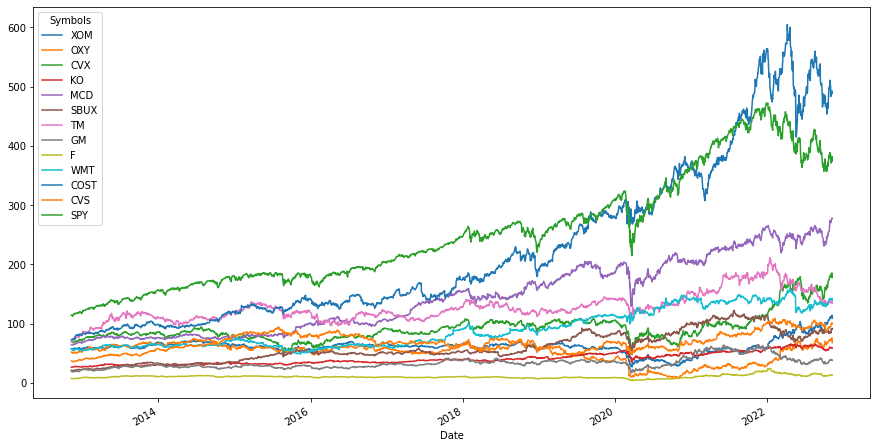

In [879]:
# Graficar

closes.plot(figsize=(15,8))

In [880]:
# Método describe

closes.describe()

Symbols,XOM,OXY,CVX,KO,MCD,SBUX,TM,GM,F,WMT,COST,CVS,SPY
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000
mean,61.323324,51.529468,92.287537,40.648128,144.667298,60.013099,127.110685,33.572767,10.438785,89.767973,224.019642,68.917851,252.169205
std,12.015338,16.688152,22.952485,9.666064,60.936311,24.959932,23.512898,9.575558,2.701862,31.232531,135.338844,15.608914,94.412691
min,26.984413,8.807385,47.980083,26.294050,63.690685,20.307535,68.311134,16.761730,3.904326,48.553204,72.482071,35.586658,112.423973
25%,57.999317,43.137630,78.689421,32.626770,80.830103,43.940771,111.985065,26.964239,8.905017,63.068124,125.708851,58.104093,178.217789
50%,61.466543,56.821537,86.278706,38.242088,141.787918,52.111181,121.965000,31.130008,10.102593,78.105988,165.372078,66.949368,234.695786
75%,65.018375,62.214783,100.653654,47.693997,197.737076,79.319427,135.934708,37.067209,11.451263,117.746523,294.946121,81.467384,307.628746
max,114.000000,75.970001,185.610001,65.259270,278.399994,122.130882,211.369995,65.590248,24.649670,158.600235,604.924255,108.963287,472.242310


In [881]:
# Obtener las columnas de la tabla

closes.columns

Index(['XOM', 'OXY', 'CVX', 'KO', 'MCD', 'SBUX', 'TM', 'GM', 'F', 'WMT',
       'COST', 'CVS', 'SPY'],
      dtype='object', name='Symbols')

In [882]:
# Obtener las fechas

closes.index

DatetimeIndex(['2012-11-09', '2012-11-12', '2012-11-13', '2012-11-14',
               '2012-11-15', '2012-11-16', '2012-11-19', '2012-11-20',
               '2012-11-21', '2012-11-23',
               ...
               '2022-10-27', '2022-10-28', '2022-10-31', '2022-11-01',
               '2022-11-02', '2022-11-03', '2022-11-04', '2022-11-07',
               '2022-11-08', '2022-11-09'],
              dtype='datetime64[ns]', name='Date', length=2518, freq=None)

In [883]:
# Método pct_change (Rendimientos diarios)

R = closes.pct_change().dropna()
R

Symbols,XOM,OXY,CVX,KO,MCD,SBUX,TM,GM,F,WMT,COST,CVS,SPY
Date,,,,,,,,,,,,,
2012-11-12,0.001261,-0.001566,0.000850,-0.005787,0.001652,-0.005495,-0.012079,0.008786,0.003659,0.002351,0.005447,-0.002373,0.000796
2012-11-13,-0.009734,-0.021822,-0.006136,0.002217,-0.002828,-0.003170,0.002188,-0.017419,0.002735,-0.009244,-0.003021,-0.000432,-0.003472
2012-11-14,-0.004626,-0.011889,-0.018012,-0.004148,-0.000236,-0.029219,-0.018749,-0.026188,-0.030000,-0.006963,-0.009904,-0.017737,-0.013499
2012-11-15,0.000813,-0.000676,-0.008585,0.011664,-0.006736,-0.008395,0.050386,-0.011998,-0.009372,-0.036320,0.013020,-0.015636,-0.001692
2012-11-16,0.003599,-0.001488,0.007676,0.003569,0.000833,0.006814,0.022801,-0.001256,-0.006623,-0.010041,-0.000104,0.002237,0.004937
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-03,0.013594,0.014909,0.014734,-0.000510,0.009543,0.001182,-0.001034,-0.000260,0.015314,-0.000213,0.005750,0.010331,-0.010297
2022-11-04,0.010891,0.015382,0.012643,0.008166,0.006118,0.084790,0.015527,0.012724,0.018854,0.001777,0.000247,0.017996,0.014393
2022-11-07,0.011842,0.036850,0.011940,0.003881,0.006518,-0.015349,-0.000655,0.010000,0.014064,0.010499,0.004400,0.016272,0.009566


In [884]:
# Obtener los rendimientos de las acciones, quitando el indice

r_acciones = R.iloc[:,:-1]
r_acciones

Symbols,XOM,OXY,CVX,KO,MCD,SBUX,TM,GM,F,WMT,COST,CVS
Date,,,,,,,,,,,,
2012-11-12,0.001261,-0.001566,0.000850,-0.005787,0.001652,-0.005495,-0.012079,0.008786,0.003659,0.002351,0.005447,-0.002373
2012-11-13,-0.009734,-0.021822,-0.006136,0.002217,-0.002828,-0.003170,0.002188,-0.017419,0.002735,-0.009244,-0.003021,-0.000432
2012-11-14,-0.004626,-0.011889,-0.018012,-0.004148,-0.000236,-0.029219,-0.018749,-0.026188,-0.030000,-0.006963,-0.009904,-0.017737
2012-11-15,0.000813,-0.000676,-0.008585,0.011664,-0.006736,-0.008395,0.050386,-0.011998,-0.009372,-0.036320,0.013020,-0.015636
2012-11-16,0.003599,-0.001488,0.007676,0.003569,0.000833,0.006814,0.022801,-0.001256,-0.006623,-0.010041,-0.000104,0.002237
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-03,0.013594,0.014909,0.014734,-0.000510,0.009543,0.001182,-0.001034,-0.000260,0.015314,-0.000213,0.005750,0.010331
2022-11-04,0.010891,0.015382,0.012643,0.008166,0.006118,0.084790,0.015527,0.012724,0.018854,0.001777,0.000247,0.017996
2022-11-07,0.011842,0.036850,0.011940,0.003881,0.006518,-0.015349,-0.000655,0.010000,0.014064,0.010499,0.004400,0.016272


In [885]:
# Haces un array (lista) con los datos del índice
 
r_SPY = R.iloc[:,-1]
r_SPY.values

array([ 0.00079639, -0.00347199, -0.01349881, ...,  0.00956558,
        0.00539541, -0.02060208])

In [886]:
#Iniciar una lista en blanco
beta_acciones = []

#Calcular beta usando la covarianza (indice,acción) y la varianza (índice)
#Formula
for a in r_acciones.columns:
    r_acciones[a]
    cov_F = np.cov(r_acciones[a].values,r_SPY.values)[0,1]
    var_X= np.var(r_SPY.values)
    beta = cov_F/var_X
    print (beta)
    beta_acciones.append(beta)
    
#Append a la lista anteriormente mencionada


0.9282350336736674
1.323396056883447
1.060831659580091
0.6428657419671174
0.7248641334203894
1.0314101133279263
0.7495383141676839
1.2345505001613728
1.1706778762447172
0.5373327791310203
0.7244749479411117
0.7777559874314885


In [887]:
#Creamos un array con la lista

betas = np.array([beta_acciones])
betas

array([[0.92823503, 1.32339606, 1.06083166, 0.64286574, 0.72486413,
        1.03141011, 0.74953831, 1.2345505 , 1.17067788, 0.53733278,
        0.72447495, 0.77775599]])

<AxesSubplot:xlabel='Date'>

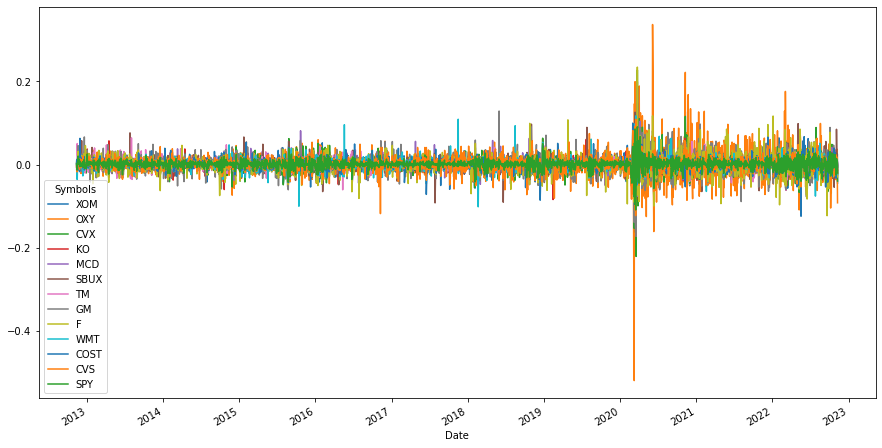

In [888]:
# Gráfica

R.plot(figsize=(15,8))

## Segundo módulo: Predicción

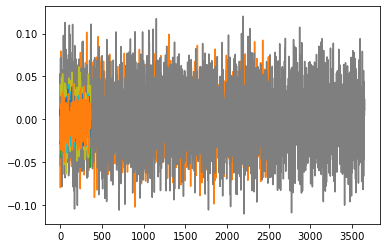

In [889]:
# Utiliar la media y std en contrada en el modulo anterior para obtener los datos de los futuos rendimientos a 1 año

#Cambiar años
XOM2023 = np.random.normal(R['XOM'].mean(),R['XOM'].std(),size=365)
plt.plot(XOM2023)
plt.grid()

OXY2023 = np.random.normal(R['OXY'].mean(),R['OXY'].std(),size=365)
plt.plot(OXY2023)
plt.grid()

CVX2023 = np.random.normal(R['CVX'].mean(),R['CVX'].std(),size=365)
plt.plot(CVX2023)
plt.grid()

KO2032 = np.random.normal(R['KO'].mean(),R['KO'].std(),size=365)
plt.plot(KO2032)
plt.grid()

MCD2032 = np.random.normal(R['MCD'].mean(),R['MCD'].std(),size=365)
plt.plot(MCD2032)
plt.grid()

SBUX2032 = np.random.normal(R['SBUX'].mean(),R['SBUX'].std(),size=365)
plt.plot(SBUX2032)
plt.grid()

TM2032 = np.random.normal(R['TM'].mean(),R['TM'].std(),size=365)
plt.plot(TM2032)
plt.grid()

GM2032 = np.random.normal(R['GM'].mean(),R['GM'].std(),size=365)
plt.plot(TSLA2032)
plt.grid()

F2032 = np.random.normal(R['F'].mean(),R['F'].std(),size=365)
plt.plot(F2032)
plt.grid()

WMT2032 = np.random.normal(R['WMT'].mean(),R['WMT'].std(),size=365)
plt.plot(WMT2032)
plt.grid()

COST2032 = np.random.normal(R['COST'].mean(),R['COST'].std(),size=365)
plt.plot(COST2032)
plt.grid()

CVS2032 = np.random.normal(R['CVS'].mean(),R['CVS'].std(),size=365)
plt.plot(CVS2032)
plt.grid()

In [890]:
# Simulamos los rendimientos a futuros, plazmandolos en una tabla

def simR(m,s,start,periods,N):
    return pd.DataFrame(data=np.random.normal(m,s,size=(periods,N)),
                        index=pd.date_range(start,periods=periods))

In [891]:
# R = retornos
# Los retornos de cada accion se encuentran de manera aleatoria, tomando en cuenta la media y la deviación estandar de la acción
# Se corren 365 días y 200 casos por día
# Se muestran los últimos 3 datos

R_XOM=simR(R['XOM'].mean(),R['XOM'].std(),'2022-11-08',365,200)
R_XOM.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-05,0.011178,-0.006590,0.009827,-0.025850,-0.006682,-0.019584,-0.010447,-0.003671,-0.006186,-0.032109,...,-0.003025,0.046454,0.005172,0.017776,-0.033229,0.009572,0.026795,0.006239,-0.011552,0.038164
2023-11-06,0.003943,-0.007977,-0.038540,-0.013238,-0.005221,0.003806,-0.013010,0.000451,-0.014627,-0.022954,...,-0.013189,0.008603,-0.001838,0.022541,0.007875,-0.021496,0.026347,0.008419,0.011230,0.000994
2023-11-07,0.018141,-0.005073,-0.002423,-0.004668,-0.010851,-0.019541,-0.017586,-0.002109,-0.024190,-0.008179,...,0.000959,-0.000227,0.007393,-0.009568,0.003929,-0.006951,-0.015729,-0.001037,-0.002767,-0.002330


In [892]:
R_OXY=simR(R['OXY'].mean(),R['OXY'].std(),'2022-11-08',365,200)
R_OXY.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-05,0.028617,-0.010237,0.011088,0.035061,-0.035751,-0.004357,-0.015098,0.057544,-0.012458,-0.034613,...,-0.012224,0.027856,0.000468,-0.006108,-0.035469,-0.017018,0.043508,0.058670,0.007768,0.013352
2023-11-06,-0.026970,-0.072454,0.041150,-0.003455,-0.057550,0.008688,0.035182,0.038548,-0.014318,0.033978,...,-0.030175,0.022547,0.079571,-0.035998,-0.037435,0.000965,0.006336,0.019571,-0.029089,-0.038342
2023-11-07,-0.005630,0.024078,0.034687,-0.023992,0.046921,0.002875,-0.005738,0.012725,-0.001572,-0.020312,...,0.014425,-0.005485,-0.023186,0.003080,-0.017206,0.012711,-0.010410,0.009909,-0.025440,0.022478


In [893]:
R_CVX=simR(R['CVX'].mean(),R['CVX'].std(),'2022-11-08',365,200)
R_CVX.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-05,-0.005718,0.000643,0.019236,-0.023638,0.005643,-0.032645,-0.007970,0.009751,-0.011266,0.007345,...,0.004841,-0.011796,0.022035,0.025681,0.009479,0.007301,-0.030201,-0.023054,0.010472,-0.020161
2023-11-06,-0.020519,0.023659,0.010890,-0.018335,0.004532,-0.020175,-0.008680,0.008496,-0.003296,-0.001586,...,-0.010836,0.008090,0.013558,-0.022829,-0.007778,-0.008427,0.013514,-0.016439,0.007808,0.016984
2023-11-07,0.000368,-0.005863,-0.018585,0.015262,-0.020044,0.027194,-0.008961,-0.009738,-0.011335,0.006994,...,-0.022704,-0.010080,0.005585,-0.018117,-0.006343,0.005507,-0.024007,0.020620,0.020757,0.011291


In [894]:
R_KO=simR(R['KO'].mean(),R['KO'].std(),'2022-11-08',365,200)
R_KO.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-05,0.005072,-0.001298,-0.001172,0.007073,0.003912,0.015254,-0.029153,0.032521,0.004493,-0.000013,...,0.002621,-0.008930,0.000391,0.001418,0.002752,0.004866,0.033230,-0.009457,0.020856,0.014610
2023-11-06,-0.006447,0.003739,-0.005886,-0.003579,0.006986,-0.009740,-0.006125,0.004905,0.009679,-0.007200,...,-0.002791,0.019123,-0.005275,-0.000797,-0.002095,0.003613,0.009615,-0.004731,-0.001123,-0.014162
2023-11-07,-0.005988,-0.004328,0.003096,-0.011838,0.014655,0.000367,0.011018,0.011704,-0.017621,0.004571,...,-0.001540,-0.005000,0.009698,-0.002300,-0.000824,0.014337,-0.001274,0.015062,-0.029734,-0.000903


In [895]:
R_MCD=simR(R['MCD'].mean(),R['MCD'].std(),'2022-11-08',365,200)
R_MCD.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-05,0.003217,0.017007,-0.009082,-0.008476,0.005099,-0.021523,0.003911,0.008430,-0.010846,-0.004085,...,0.021162,-0.008758,0.010412,-0.006579,0.017300,0.008628,0.017707,-0.022074,0.006616,0.003177
2023-11-06,0.007677,-0.025644,-0.002442,-0.008584,-0.011893,-0.005355,0.016713,-0.025744,-0.018132,0.013289,...,0.007314,-0.004724,-0.002594,-0.003512,0.004207,-0.003913,-0.034471,0.002310,0.002031,-0.009743
2023-11-07,-0.000036,-0.009880,-0.013401,0.002363,0.012841,0.006414,0.002812,-0.005411,0.006075,-0.010519,...,-0.010237,0.009178,-0.017853,-0.002895,0.001617,0.010738,0.019510,-0.018419,-0.007666,0.010010


In [896]:
R_SBUX=simR(R['SBUX'].mean(),R['SBUX'].std(),'2022-11-08',365,200)
R_SBUX.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-05,0.006654,-0.003921,-0.009514,-0.014430,-0.038949,0.015270,0.021306,0.024635,0.021698,0.005460,...,-0.018145,-0.023116,0.006288,-0.009461,0.012094,-0.011185,-0.007484,0.022046,0.010092,-0.050834
2023-11-06,0.012933,0.009531,-0.002689,0.006440,0.004537,-0.011143,-0.005169,0.021626,0.003607,0.006205,...,0.012560,0.011237,-0.000156,-0.008841,0.000051,0.012951,-0.003513,-0.018053,0.014326,-0.008758
2023-11-07,-0.001357,0.021538,-0.009159,0.019458,-0.015789,-0.008522,0.000379,-0.000623,-0.002254,-0.016432,...,0.005132,0.000903,0.000052,-0.013721,-0.014494,-0.011454,0.016245,-0.014073,-0.001380,-0.005866


In [897]:
R_TM=simR(R['TM'].mean(),R['TM'].std(),'2022-11-08',365,200)
R_TM.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-05,-0.017755,-0.018557,0.008778,-0.014497,-0.009796,0.007218,0.001441,-0.004103,-0.014097,-0.020551,...,-0.017589,-0.001999,-0.013147,0.007655,-0.008377,0.035159,0.011744,-0.002235,-0.007423,-0.001912
2023-11-06,-0.014484,0.013560,-0.014977,-0.003625,-0.005948,0.000860,0.014564,0.021770,0.004252,0.009046,...,0.033010,0.020844,-0.042802,0.007203,0.021161,-0.025354,0.016208,0.002713,-0.008806,0.018414
2023-11-07,-0.013533,-0.002156,0.022275,0.012543,0.010799,0.022762,-0.000544,0.007964,-0.013055,-0.008104,...,-0.023445,-0.004566,-0.016655,-0.004413,0.017709,0.006044,0.012200,0.001070,-0.011059,0.019295


In [898]:
R_GM=simR(R['GM'].mean(),R['GM'].std(),'2022-11-08',365,200)
R_GM.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-05,0.010963,-0.016060,0.002907,-0.005979,0.013642,0.008437,0.029153,-0.025308,-0.000062,0.016493,...,-0.027674,-0.002774,-0.010992,0.022982,-0.001341,-0.037601,-0.024775,0.029006,0.011792,-0.003772
2023-11-06,-0.009143,-0.013918,0.010368,-0.018356,-0.029256,0.035706,-0.022957,0.015572,0.035195,-0.034334,...,0.028150,-0.037142,0.004757,0.023310,0.001153,-0.003112,0.006737,-0.035659,0.022649,0.016848
2023-11-07,-0.024217,-0.023792,-0.014872,-0.006937,0.017414,0.012495,0.006530,0.045611,-0.017689,-0.022850,...,-0.013843,0.020585,-0.010716,-0.038568,0.029441,-0.006157,-0.030450,0.015398,-0.029407,-0.035514


In [899]:
R_F=simR(R['F'].mean(),R['F'].std(),'2022-11-08',365,200)
R_F.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-05,0.038003,0.009922,-0.016703,-0.024112,0.007550,-0.031501,0.010650,0.013975,0.014469,0.032277,...,0.026600,-0.006724,-0.014894,-0.012262,0.020121,0.008184,0.002909,0.001007,0.001033,0.000884
2023-11-06,0.015781,-0.000674,0.009300,0.031043,0.043443,0.024384,-0.014563,0.012253,0.013645,0.007987,...,0.000087,0.009447,-0.009892,-0.000846,0.012480,-0.048511,-0.026031,-0.019963,0.028557,0.028777
2023-11-07,0.000330,-0.007152,-0.005997,-0.010500,0.015988,0.001127,0.000200,-0.004176,0.011730,0.019904,...,0.005079,0.010543,0.031206,-0.028154,-0.011605,0.004836,0.011547,-0.012316,-0.019620,-0.031069


In [900]:
R_WMT=simR(R['WMT'].mean(),R['WMT'].std(),'2022-11-08',365,200)
R_WMT.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-05,0.011910,-0.002319,-0.000053,0.028219,-0.005809,-0.005361,-0.000448,0.006108,-0.011047,0.023954,...,0.009665,-0.007939,-0.008373,-0.011333,0.002963,0.007746,-0.005347,-0.006777,-0.017405,0.005989
2023-11-06,-0.001902,0.008177,0.001219,0.025624,0.010455,0.003410,0.005138,-0.013033,0.004765,-0.017182,...,-0.005981,0.000163,0.024317,0.010624,-0.004390,0.011045,-0.009485,-0.014467,0.000136,0.004744
2023-11-07,-0.003029,0.019352,-0.004113,0.003981,0.013575,-0.013901,0.007103,-0.004017,0.022514,0.009070,...,-0.007333,-0.010131,-0.010575,-0.009400,0.005044,-0.011582,0.017453,-0.010421,-0.014332,0.002459


In [901]:
R_COST=simR(R['COST'].mean(),R['COST'].std(),'2022-11-08',365,200)
R_COST.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-05,0.002296,-0.019956,0.009760,0.011284,0.013897,-0.006259,0.005251,0.000962,-0.002268,0.003968,...,-0.005301,0.011815,0.011169,-0.005131,-0.016276,-0.003147,0.006675,0.024282,-0.004778,0.017005
2023-11-06,-0.010109,0.004621,-0.008185,0.008334,0.001008,0.006830,-0.001725,0.013692,0.024472,-0.011286,...,0.004299,-0.013189,0.003365,-0.000443,-0.012613,0.003671,0.002710,0.016580,0.014044,-0.016376
2023-11-07,0.013378,0.017633,0.022649,-0.001053,-0.011651,0.001648,0.008515,-0.003425,0.009287,-0.003953,...,-0.013737,-0.016772,-0.018174,0.016964,0.005729,-0.007689,-0.002828,0.004689,0.002771,-0.008376


In [902]:
R_CVS=simR(R['CVS'].mean(),R['CVS'].std(),'2022-11-08',365,200)
R_CVS.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-05,0.002124,-0.000542,0.030816,0.003699,-0.000804,0.004986,-0.015398,0.023915,-0.024173,0.001551,...,0.020286,-0.002095,-0.008386,0.006424,-0.001481,0.000143,-0.024899,-0.002294,-0.020105,0.001378
2023-11-06,0.001501,0.031230,0.003633,0.004482,-0.013920,0.024828,-0.005952,-0.008859,0.016423,-0.007923,...,0.016951,0.018269,0.036452,-0.029522,0.000577,0.017510,-0.023748,-0.007156,-0.002246,0.005269
2023-11-07,-0.013137,-0.001934,-0.018498,0.007689,-0.005189,0.005217,0.044997,-0.031485,0.016055,-0.008549,...,-0.013323,-0.011479,0.010074,-0.002240,-0.005609,-0.011067,-0.011116,0.023309,-0.006244,-0.005785


In [903]:
# Se obtienen los valores ubicados en las ultimas posiciones de la tabla original de cierres

closes.iloc[-1]

Symbols
XOM     108.900002
OXY      67.930000
CVX     177.929993
KO       58.770000
MCD     277.790009
SBUX     91.629997
TM      134.529999
GM       38.060001
F        13.310000
WMT     139.470001
COST    489.970001
CVS      99.559998
SPY     374.130005
Name: 2022-11-09 00:00:00, dtype: float64

In [904]:
# Producto acumulado = cumprod
# Se le suma uno para que de precio mas interes, no solo los interes
# EJ: Precio actual $108.9

(R_XOM+1).cumprod().tail(1)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-07,1.746915,0.957707,1.053252,1.219192,0.578245,1.207458,0.914251,1.302143,0.917929,1.448456,...,1.54104,1.014235,1.015316,1.353854,1.561624,2.093593,0.559697,0.7952,1.492555,1.389517


In [905]:
#Markdown & Formula

precios_simulados_XOM = closes['XOM'][-1]*(R_XOM+1).cumprod().tail()
precios_simulados_XOM

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-03,181.216829,107.384848,119.423270,136.867500,63.119372,138.483842,102.487286,140.098303,107.627876,166.067351,...,169.679322,104.864736,111.450442,144.939072,174.541584,235.225874,58.784314,85.682060,162.682357,142.484095
2023-11-04,184.058105,106.369930,118.422856,138.769347,64.426311,136.273067,103.764065,142.562176,104.608307,168.173771,...,170.414824,104.670701,109.392790,143.034933,173.848410,232.407188,58.760871,85.430532,163.064046,145.951205
2023-11-05,186.115519,105.668945,119.586630,135.182228,63.995840,133.604298,102.680054,142.038834,103.961241,162.773890,...,169.899262,109.533051,109.958565,145.577541,168.071679,234.631847,60.335372,85.963505,161.180300,151.521294
2023-11-06,186.849458,104.826070,114.977756,133.392689,63.661739,134.112824,101.344158,142.102965,102.440568,159.037615,...,167.658425,110.475333,109.756437,148.858975,169.395294,229.588155,61.925046,86.687220,162.990333,151.671875
2023-11-07,190.239052,104.294335,114.699116,132.769971,62.970927,131.492133,99.561930,141.803332,99.962508,157.736845,...,167.819246,110.450230,110.567904,147.434669,170.060891,227.992279,60.951026,86.597332,162.539264,151.318421


In [906]:
XOM = precios_simulados_XOM.iloc[-1,:].mean()
XOM

128.91117276274136

In [907]:
XOM_r = (R_XOM+1).cumprod().tail(1).mean().mean()-1
XOM_r

0.18375730905850451

In [908]:
(R_OXY+1).cumprod().tail(1)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-07,0.632253,2.201684,0.973874,1.928628,0.372931,1.245082,1.273948,1.507091,0.557093,0.593887,...,3.717346,1.706218,0.533439,0.711655,0.53668,1.970411,0.764509,1.293655,1.130041,1.741847


In [909]:
precios_simulados_OXY = closes['OXY'][-1]*(R_OXY+1).cumprod().tail()
precios_simulados_OXY

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-03,43.225775,157.181695,60.660626,129.411514,27.276817,82.312543,87.915239,92.505062,40.055873,41.634939,...,267.391296,117.970153,33.446938,50.803745,40.917747,140.907715,49.532946,76.836419,85.953516,124.018600
2023-11-04,43.154343,159.080337,60.737021,130.134974,26.627424,83.975449,85.369484,92.041748,38.938609,41.253937,...,259.850073,110.884190,34.346315,50.301200,39.954739,134.328592,49.974660,80.615716,80.502165,118.750782
2023-11-05,44.389295,157.451863,61.410462,134.697609,25.675459,83.609536,84.080594,97.338187,38.453496,39.826019,...,256.673635,113.972932,34.362392,49.993952,38.537565,132.042617,52.148968,85.345443,81.127497,120.336375
2023-11-06,43.192105,146.043906,63.937492,134.232197,24.197842,84.335946,87.038724,101.090334,37.902930,41.179213,...,248.928400,116.542653,37.096631,48.194264,37.094902,132.170015,52.479391,87.015736,78.767564,115.722412
2023-11-07,42.948927,149.560410,66.155276,131.011690,25.333234,84.578414,86.539278,102.376696,37.843348,40.342765,...,252.519293,115.903359,36.236502,48.342713,36.456648,133.849987,51.933077,87.877969,76.763701,118.323654


In [910]:
OXY = precios_simulados_OXY.iloc[-1,:].mean()
OXY

82.57788191651083

In [911]:
OXY_r = (R_OXY+1).cumprod().tail(1).mean().mean()-1
OXY_r

0.21563199684277112

In [912]:
(R_CVX+1).cumprod().tail(1)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-07,0.58197,1.06316,1.010086,0.838076,0.732942,0.645767,0.97518,1.107858,1.447634,1.120529,...,1.220806,1.256801,1.235502,0.70111,1.527375,0.957171,0.820756,1.712891,0.77185,0.934299


In [913]:
precios_simulados_CVX = closes['CVX'][-1]*(R_CVX+1).cumprod().tail()
precios_simulados_CVX

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-03,113.076337,188.663953,178.465550,149.071706,132.261485,118.688588,184.112168,197.994454,262.948716,195.600488,...,225.374017,218.764216,209.310239,127.407894,272.751451,168.038652,155.191928,301.919970,133.606501,165.854820
2023-11-04,106.288015,185.766310,177.736152,153.242879,131.736161,118.015218,178.034652,195.476564,264.370522,196.859666,...,223.616687,226.761545,211.037356,126.762975,273.056355,169.578011,152.231648,310.772836,132.116632,164.964383
2023-11-05,105.680273,185.885804,181.155145,149.620551,132.479518,114.162568,176.615758,197.382569,261.392248,198.305558,...,224.699188,224.086757,215.687614,130.018418,275.644634,170.816124,147.634121,303.608240,133.500158,161.638485
2023-11-06,103.511853,190.283628,183.127975,146.877304,133.079901,111.859375,175.082701,199.059555,260.530740,197.990998,...,222.264313,225.899681,218.611899,127.050278,273.500649,169.376690,149.629234,298.617119,134.542540,164.383778
2023-11-07,103.549992,189.167998,179.724598,149.118931,130.412397,114.901316,173.513797,197.121079,257.577575,199.375770,...,217.218086,223.622561,219.832926,124.748531,271.765902,170.309509,146.037143,304.774614,137.335265,166.239844


In [914]:
CVX = precios_simulados_CVX.iloc[-1,:].mean()
CVX

213.04266147691794

In [915]:
CVX_r = ((R_CVX+1).cumprod().tail(1).mean().mean())-1
CVX_r

0.1973397979345608

In [916]:
(R_KO+1).cumprod().tail(1)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-07,1.101573,0.72816,1.079242,1.241664,1.094431,0.791656,0.969039,1.519671,0.923165,0.835038,...,1.366406,0.977016,0.77891,1.051348,1.082541,1.342392,1.459924,1.055311,0.880932,1.565088


In [917]:
precios_simulados_KO = closes['KO'][-1]*(R_KO+1).cumprod().tail()
precios_simulados_KO

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-03,65.314054,43.118625,63.577977,73.149149,63.528782,46.405431,58.903300,84.088119,54.363521,49.868811,...,81.471356,56.722175,45.093059,62.528919,63.788427,75.848715,80.680863,61.146422,51.801952,93.791932
2023-11-04,65.221303,42.875544,63.680286,73.591519,62.705645,46.260371,58.378825,85.080082,54.453471,49.206847,...,80.441826,57.135094,45.559435,61.891847,63.631979,77.122050,82.354354,61.976934,52.327588,92.041068
2023-11-05,65.552077,42.819904,63.605673,74.112024,62.950965,46.966025,56.676901,87.846970,54.698106,49.206209,...,80.652661,56.624885,45.577233,61.979585,63.807090,77.497321,85.090967,61.390797,53.418939,93.385834
2023-11-06,65.129449,42.979989,63.231280,73.846788,63.390725,46.508557,56.329739,88.277889,55.227555,48.851917,...,80.427544,57.707731,45.336827,61.930179,63.673419,77.777295,85.909129,61.100337,53.358954,92.063331
2023-11-07,64.739438,42.793975,63.427065,72.972604,64.319700,46.525605,56.950396,89.311078,54.254402,49.075199,...,80.303693,57.419214,45.776514,61.787729,63.620935,78.892357,85.799712,62.020634,51.772388,91.980239


In [918]:
KO = precios_simulados_KO.iloc[-1,:].mean()
KO

67.93749168056114

In [919]:
KO_r = (R_KO+1).cumprod().tail(1).mean().mean()-1
KO_r

0.15598929983650178

In [920]:
(R_MCD+1).cumprod().head(1)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2022-11-08,1.009007,1.00394,0.998937,1.005402,0.990213,0.991304,0.988473,1.005273,1.002286,1.020985,...,0.991009,1.001616,0.998436,1.010361,1.007601,1.007986,0.997177,1.000048,1.012827,1.006543


In [921]:
precios_simulados_MCD = closes['MCD'][-1]*(R_MCD+1).cumprod().tail()
precios_simulados_MCD

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-03,271.896353,391.811526,314.520093,412.914272,354.929780,402.600975,245.274609,411.716822,334.774199,537.198698,...,299.676404,309.962221,406.814115,301.671414,276.846317,266.437659,371.751797,312.060954,371.984003,236.114012
2023-11-04,271.003566,391.628450,319.313985,418.526783,357.294354,399.990382,244.630769,417.974629,341.376424,518.193055,...,297.508595,305.938983,416.144193,296.738843,271.208295,266.384975,369.772983,316.225700,370.461577,234.884660
2023-11-05,271.875393,398.289050,316.414024,414.979447,359.116145,391.381379,245.587454,421.498147,337.674017,516.076392,...,303.804532,303.259646,420.477271,294.786569,275.900285,268.683226,376.320446,309.245477,372.912488,235.630986
2023-11-06,273.962634,388.075205,315.641238,411.417056,354.845025,389.285715,249.691882,410.647043,331.551184,522.934761,...,306.026705,301.827174,419.386485,293.751218,277.061026,267.631956,363.348156,309.959956,373.670024,233.335343
2023-11-07,273.952812,384.241144,311.411328,412.389275,359.401585,391.782448,250.393924,408.424928,333.565195,517.434260,...,302.894049,304.597382,411.899183,292.900891,277.509031,270.505751,370.436977,304.250956,370.805420,235.670957


In [922]:
MCD = precios_simulados_MCD.iloc[-1,:].mean()
MCD

337.7972632765248

In [923]:
MCD_r = (R_MCD+1).cumprod().tail(1).mean().mean()-1
MCD_r

0.21601660565807856

In [924]:
(R_SBUX+1).cumprod().tail(1)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-07,0.579427,1.74651,0.852688,1.813314,1.405505,3.620388,1.846947,1.188027,1.244328,1.300943,...,1.63629,1.398465,1.506746,1.394078,1.360412,0.900954,1.206455,1.212377,0.988054,1.194389


In [925]:
precios_simulados_SBUX = closes['SBUX'][-1]*(R_SBUX+1).cumprod().tail()
precios_simulados_SBUX

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-03,52.474971,159.231992,79.797992,164.499866,137.244835,329.273225,164.253665,101.920995,111.196662,122.248574,...,148.982544,128.945417,137.838682,131.937719,122.415090,83.375474,109.146220,111.261791,89.658415,119.656391
2023-11-04,52.139336,155.790346,79.826062,164.310697,135.540615,333.268844,166.502969,104.057470,111.446463,119.795474,...,150.039996,129.598955,137.214656,131.919797,124.969938,83.375756,109.986942,112.272185,88.487030,117.008292
2023-11-05,52.486275,155.179560,79.066628,161.939675,130.261486,338.357794,170.050538,106.620927,113.864627,120.449610,...,147.317484,126.603097,138.077518,130.671751,126.481374,82.443223,109.163810,114.747349,89.380050,111.060296
2023-11-06,53.165065,156.658585,78.854011,162.982579,130.852448,334.587443,169.171553,108.926753,114.275339,121.196943,...,149.167750,128.025753,138.055967,129.516516,126.487882,83.510954,108.780323,112.675825,90.660477,110.087580
2023-11-07,53.092938,160.032747,78.131768,166.153934,128.786387,331.736113,169.235737,108.858930,114.017764,119.205438,...,149.933289,128.141329,138.063157,127.739387,124.654575,82.554404,110.547479,111.090141,90.535406,109.441818


In [926]:
SBUX = precios_simulados_SBUX.iloc[-1,:].mean()
SBUX

118.42958895472977

In [927]:
SBUX_r = (R_SBUX+1).cumprod().tail(1).mean().mean()-1
SBUX_r

0.292476181432082

In [928]:
(R_TM+1).cumprod().tail(1)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-07,0.771221,0.973809,0.797643,1.526499,1.259005,1.693395,1.129449,0.94773,0.947409,1.252594,...,0.547501,0.736634,0.750883,0.91062,1.032149,1.31446,1.046145,1.419798,1.143464,1.274684


In [929]:
precios_simulados_TM = closes['TM'][-1]*(R_TM+1).cumprod().tail()
precios_simulados_TM

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-03,107.297715,133.689119,106.521965,205.558062,170.135427,225.843197,149.077387,124.453624,132.244988,173.111413,...,75.682525,97.400565,107.860266,119.196239,133.223925,172.833088,138.551880,188.034696,157.842257,165.056601
2023-11-04,108.650533,131.982363,105.637455,206.548230,170.234423,220.956079,149.629418,124.305774,130.432860,171.897810,...,74.320606,97.716461,108.750635,121.240754,134.740121,174.219105,135.235894,190.711237,158.106027,165.511788
2023-11-05,106.721475,129.533151,106.564730,203.553988,168.566859,222.550902,149.845029,123.795690,128.594117,168.365168,...,73.013367,97.521162,107.320854,122.168844,133.611384,180.344487,136.824057,190.285077,156.932477,165.195276
2023-11-06,105.175677,131.289565,104.968757,202.816051,167.564307,222.742243,152.027382,126.490687,129.140880,169.888167,...,75.423554,99.553925,102.727262,123.048771,136.438715,175.772021,139.041692,190.801359,155.550469,168.237132
2023-11-07,103.752372,131.006513,107.306924,205.359944,169.373910,227.812370,151.944721,127.498094,127.454893,168.511460,...,73.655276,99.099409,101.016302,122.505771,138.854963,176.834358,140.737935,191.005437,153.830178,171.483204


In [930]:
TM = precios_simulados_TM.iloc[-1,:].mean()
TM

154.05509580934165

In [931]:
TM_r = (R_XOM+1).cumprod().tail(1).mean().mean()-1
TM_r

0.18375730905850451

In [932]:
(R_GM+1).cumprod().tail(1)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-07,0.777037,0.658419,0.804585,1.206995,1.513639,2.091048,1.101978,0.462388,0.649282,1.818342,...,1.085816,1.826915,0.776737,1.068389,1.853339,0.939038,1.820694,0.874402,1.009673,0.805834


In [933]:
precios_simulados_GM = closes['GM'][-1]*(R_GM+1).cumprod().tail()
precios_simulados_GM

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-03,30.332259,26.077795,30.445871,45.689587,58.491980,76.846614,41.980092,17.444188,24.695040,72.022807,...,41.541629,68.720188,28.543059,39.280162,70.435243,36.555934,71.338260,32.720391,37.978000,30.451080
2023-11-04,30.255970,26.457408,30.676657,47.407561,57.544536,75.258347,41.440142,17.003056,24.302916,72.152607,...,41.918960,70.954767,30.071896,40.402170,68.533745,37.482825,72.797186,33.028953,38.264381,31.390934
2023-11-05,30.587658,26.032496,30.765846,47.124110,58.329546,75.893306,42.648253,16.572737,24.301402,73.342631,...,40.758907,70.757968,29.741355,41.330672,68.441851,36.073439,70.993670,33.986991,38.715587,31.272513
2023-11-06,30.307997,25.670163,31.084821,46.259117,56.623082,78.603140,41.669194,16.830806,25.156687,70.824476,...,41.906278,68.129899,29.882836,42.294091,68.520746,35.961187,71.471977,32.775060,39.592462,31.799380
2023-11-07,29.574020,25.059414,30.622525,45.938235,57.609093,79.585273,41.941282,17.598481,24.711686,69.206108,...,41.326158,69.532383,29.562608,40.662886,70.538074,35.739771,69.295621,33.279737,38.428171,30.670051


In [934]:
GM = precios_simulados_GM.iloc[-1,:].mean()
GM 

41.72750631670924

In [935]:
GM_r = (R_GM+1).cumprod().tail(1).mean().mean()-1
GM_r

0.0963611353412075

In [644]:
(R_F+1).cumprod().tail(1)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-07,0.970993,1.058309,0.602389,0.821022,0.984492,0.82437,1.916624,0.758913,0.533564,0.842062,...,0.736576,1.474512,1.061743,0.85044,1.06379,0.530053,1.176786,1.261824,1.115636,2.171886


In [936]:
precios_simulados_F = closes['F'][-1]*(R_F+1).cumprod().tail()
precios_simulados_F

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-03,15.659946,30.882354,16.580479,14.298716,6.850554,8.060974,17.528359,16.491561,13.072586,17.640320,...,8.096256,26.091584,23.872744,25.111722,11.167413,14.023672,19.311546,17.244815,9.729377,15.968245
2023-11-04,15.670093,30.539807,16.939043,14.852995,7.125204,8.230245,17.081893,16.298264,12.633185,18.145423,...,7.844212,25.682350,24.072507,24.857088,11.719211,13.736939,19.583622,17.370954,9.638076,15.721990
2023-11-05,16.265602,30.842819,16.656118,14.494862,7.178998,7.970981,17.263823,16.526024,12.815974,18.731110,...,8.052867,25.509665,23.713981,24.552293,11.955018,13.849361,19.640587,17.388442,9.648031,15.735883
2023-11-06,16.522291,30.822018,16.811021,14.944823,7.490873,8.165343,17.012415,16.728511,12.990853,18.880707,...,8.053570,25.750646,23.479413,24.531524,12.104214,13.177512,19.129327,17.041315,9.923551,16.188720
2023-11-07,16.527750,30.601582,16.710211,14.787909,7.610640,8.174544,17.015810,16.658649,13.143231,19.256509,...,8.094473,26.022128,24.212123,23.840864,11.963744,13.241233,19.350208,16.831442,9.728853,15.685755


In [937]:
F = precios_simulados_F.iloc[-1,:].mean()
F

15.804798569954594

In [938]:
F_r = (R_F+1).cumprod().tail(1).mean().mean()-1
F_r

0.18743787165182968

In [939]:
(R_WMT+1).cumprod().tail(1)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-07,1.072116,1.17937,0.844867,1.100607,1.078748,2.020401,1.181575,1.111416,1.153168,0.997909,...,0.812273,0.892303,1.085586,1.0647,1.609456,1.048732,1.355656,0.780504,0.830267,0.841483


In [940]:
precios_simulados_WMT = closes['WMT'][-1]*(R_WMT+1).cumprod().tail()
precios_simulados_WMT

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-03,147.953297,164.730406,114.632278,144.215677,145.755929,289.024677,165.310512,156.753652,157.194637,137.361742,...,111.377772,127.942234,150.148796,151.566166,222.726839,143.224023,189.673506,113.266238,121.325936,113.438212
2023-11-04,148.499538,160.427289,118.182464,144.981912,147.760384,286.321462,162.868568,156.732269,158.293985,137.055539,...,113.712370,126.708648,150.653611,150.027307,223.666452,145.238931,188.618008,112.379716,119.545861,115.827243
2023-11-05,150.268124,160.055210,118.176161,149.073108,146.902013,284.786501,162.795583,157.689574,156.545252,140.338635,...,114.811394,125.702645,149.392256,148.327046,224.329093,146.364007,187.609532,111.618071,117.465180,116.520893
2023-11-06,149.982278,161.363954,118.320238,152.892955,148.437908,285.757537,163.632040,155.634454,157.291169,137.927329,...,114.124659,125.723147,153.024967,149.902830,223.344349,147.980548,185.829990,110.003239,117.481197,117.073708
2023-11-07,149.528054,164.486680,117.833584,153.501648,150.453020,281.785279,164.794320,155.009233,160.832352,139.178314,...,113.287737,124.449476,151.406672,148.493732,224.470838,146.266658,189.073280,108.856865,115.797408,117.361613


In [941]:
WMT = precios_simulados_WMT.iloc[-1,:].mean()
WMT 

163.24761135788978

In [942]:
WMT_r = (R_WMT+1).cumprod().tail(1).mean().mean()-1
WMT_r

0.17048548024001242

In [943]:
(R_COST+1).cumprod().tail(1)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-07,1.200498,1.727443,0.699883,1.835218,0.989425,0.854065,1.844467,1.629119,0.865457,1.567719,...,1.695999,1.276325,1.11669,1.009685,1.072814,1.279501,1.38996,1.867113,1.411464,1.701966


In [944]:
precios_simulados_COST = closes['COST'][-1]*(R_COST+1).cumprod().tail()
precios_simulados_COST

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-03,582.650692,850.163582,338.846304,878.961306,484.176303,412.584142,895.080711,805.220989,408.351178,768.472872,...,853.692929,628.271101,552.204005,489.148315,536.019800,625.866040,685.726098,870.958368,680.096553,826.676108
2023-11-04,585.027399,844.761674,334.825933,882.749022,483.292517,417.557500,892.962580,789.384082,411.041410,776.904309,...,843.427008,637.002605,549.268539,489.188787,538.086805,631.451166,676.608044,874.475342,683.378210,840.660833
2023-11-05,586.370689,827.903897,338.093827,892.710205,490.009062,414.943893,897.651151,790.143565,410.109364,779.986760,...,838.956269,644.528877,555.403588,486.678573,529.328699,629.463996,681.124599,895.709544,680.112871,854.955937
2023-11-06,580.443140,831.729731,335.326518,900.149804,490.503099,417.777832,896.102929,800.962587,420.145724,771.183546,...,842.563182,636.027995,557.272343,486.463177,522.652327,631.774917,682.970118,910.560000,689.664201,840.955587
2023-11-07,588.208244,846.395285,342.921434,899.201881,484.788419,418.466266,903.733310,798.219496,424.047767,768.135155,...,830.988648,625.360776,547.144669,494.715421,525.646707,626.916908,681.038827,914.829558,691.575212,833.912128


In [945]:
COST = precios_simulados_COST.iloc[-1,:].mean()
COST

677.6625502544894

In [946]:
COST_r = (R_COST+1).cumprod().tail(1).mean().mean()-1
COST_r

0.3830694707148843

In [947]:
(R_CVS+1).cumprod().tail(1)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-07,0.628951,1.055249,1.081905,0.870519,1.175264,1.873865,0.947868,1.019521,1.277356,0.960276,...,2.288659,0.800585,1.029665,0.936966,1.670713,1.226243,1.180647,1.786767,0.96834,1.292597


In [948]:
precios_simulados_CVS = closes['CVS'][-1]*(R_CVS+1).cumprod().tail()
precios_simulados_CVS

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2023-11-03,63.784623,102.819557,107.459689,87.705373,120.722919,183.520712,93.893667,102.637877,126.767109,96.585138,...,216.419957,79.446877,100.941020,94.902493,165.890397,118.054605,127.850733,173.691938,98.195041,127.977334
2023-11-04,63.222486,102.131648,106.078350,85.308303,119.375968,180.199167,92.267726,103.270334,126.192227,97.049107,...,222.571389,79.351466,98.749695,95.723063,167.425942,121.309079,124.867220,175.493984,99.227023,128.584249
2023-11-05,63.356799,102.076271,109.347282,85.623840,119.280015,181.097562,90.847002,105.740010,123.141779,97.199621,...,227.086484,79.185264,97.921557,96.337945,167.178045,121.326476,121.758110,175.091468,97.232083,128.761443
2023-11-06,63.451893,105.264129,109.744518,86.007564,117.619618,185.593831,90.306237,104.803269,125.164126,96.429465,...,230.935789,80.631868,101.491035,93.493810,167.274487,123.450908,118.866558,173.838482,97.013680,129.439832
2023-11-07,62.618341,105.060568,107.714414,86.668835,117.009285,186.562016,94.369758,101.503544,127.173585,95.605064,...,227.858918,79.706285,102.513461,93.284373,166.336217,122.084713,117.545212,177.890469,96.407937,128.690972


In [949]:
CVS = precios_simulados_CVS.iloc[-1,:].mean()
CVS

120.61592009946085

In [950]:
CVS_r = (R_CVS+1).cumprod().tail(1).mean().mean()-1
CVS_r

0.2114897856287632

In [951]:
Precios_finales = np.array([XOM,OXY,CVX,KO,MCD,SBUX,TM,GM,F,WMT,COST,CVS])
Precios_finales

array([128.91117276,  82.57788192, 213.04266148,  67.93749168,
       337.79726328, 118.42958895, 154.05509581,  41.72750632,
        15.80479857, 163.24761136, 677.66255025, 120.6159201 ])

In [952]:
Ren_finales = np.array([XOM_r,OXY_r,CVX_r,KO_r,MCD_r,SBUX_r,TM_r,GM_r,F_r,WMT_r,COST_r,CVS_r])
Ren_finales

array([0.18375731, 0.215632  , 0.1973398 , 0.1559893 , 0.21601661,
       0.29247618, 0.18375731, 0.09636114, 0.18743787, 0.17048548,
       0.38306947, 0.21148979])

## Tercer módulo: Optimización y predicción final

### Utilizando linprog

In [953]:
bounds = (0,200000)
Ren_finales
betas 
u = list(np.full(len(beta_acciones),1))
q = 1000000
A = np.array([beta_acciones,u])
B = np.array([1,1])*q
c = -np.array(Ren_finales)

In [954]:
sol = opt.linprog(c=c, A_ub=A, b_ub=B, bounds=bounds)
sol

     con: array([], dtype=float64)
     fun: -263736.8078957602
 message: 'Optimization terminated successfully.'
     nit: 8
   slack: array([8.36197526e+04, 1.71516091e-04])
  status: 0
 success: True
       x: array([5.66664288e-04, 1.99999999e+05, 7.08682694e-05, 1.83978877e-04,
       1.99999999e+05, 2.00000000e+05, 5.82993825e-04, 1.04523394e-04,
       7.41752220e-04, 2.50683953e-04, 2.00000000e+05, 1.99999999e+05])

In [955]:
a = sol.x
b = a/q
b.dot(beta_acciones)

0.9163802473938341

In [956]:
a = sol.x
b = a/q
b.dot(Ren_finales)

0.2637368078957602

## Datos

In [957]:
closes.tail(1)

Symbols,XOM,OXY,CVX,KO,MCD,SBUX,TM,GM,F,WMT,COST,CVS,SPY
Date,,,,,,,,,,,,,
2022-11-09,108.900002,67.93,177.929993,58.77,277.790009,91.629997,134.529999,38.060001,13.31,139.470001,489.970001,99.559998,374.130005


In [958]:
Precios_finales

array([128.91117276,  82.57788192, 213.04266148,  67.93749168,
       337.79726328, 118.42958895, 154.05509581,  41.72750632,
        15.80479857, 163.24761136, 677.66255025, 120.6159201 ])

In [959]:
Ren_finales

array([0.18375731, 0.215632  , 0.1973398 , 0.1559893 , 0.21601661,
       0.29247618, 0.18375731, 0.09636114, 0.18743787, 0.17048548,
       0.38306947, 0.21148979])

In [960]:
betas

array([[0.92823503, 1.32339606, 1.06083166, 0.64286574, 0.72486413,
        1.03141011, 0.74953831, 1.2345505 , 1.17067788, 0.53733278,
        0.72447495, 0.77775599]])

## Resultados

In [ ]:
## Resultados tickers
>### OXY = 0
>### x2 = 200,000
>### x3 = 174,358.97
>### x4 = 200,000
>### x5 = 0
>### x6 = 200,000
>### x7 = 0
>### x8 = 0
>### x9 = 25,641.03
>### x10 = 200,000
>### x11 = 200,000
>### x12 = 200,000
>### Beta = 0.9163 U
>### Retorno % = 26.37%

## Intepretación

In [ ]:
## Interpretación
>### Una vez que utilizamos los parametros anteriormente mencionados encontramos que no invertimos en x,x,x,x. Las compañias en las que si invertimos son Apple, Tesla, Chevron, Meta, Twitter y Aspen Technologies.
>### La diversificación del portafolio es la siguiente:
>### Se invierte en  200,000 dolares correspondientes a  acciones
>### Se invierte en Tesla 200,000 dolares correspondientes a 724 acciones 
>### Se invierte en Chevron 200,000 dolares correspondientes a 1,262 acciones
>### Se invierte en Meta 200,000 dolares correspondientes a 1,439 acciones
>### Se invierte en Aspen 200,000 dolares correspondientes a 781 acciones

## Conclusión

## Conclusión
>### El portafolio de inversión con la Beta más chica posible (menor riesgo dentro de los parámetros establecidos) calculado en este programa proyecta rendimientos del 10.04% y mantiene una Beta de 1.3705. Ambas mediciones estan dentro de nuestros parametros. Este portafolio de 1 millón de dólares esta conformado por 6072 acciones de 6 distintas empresas. Ninguna de ellas tiene una participacion mayor al 20% en el portafolio.


>### Los resultados fueron muy grandes, sin embargo, solo estamos tomando en cuenta riesgos sistematicos. No estamos tomando en 